### This notebook explores two of the hypothesis of our project

#### Hypothesis 1: Warmer States within the US have lesser cases of COVID-19.
#### Hyposthesis 2: States with lower population will have lesser number of cases.

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gp
import shapefile as shp
import seaborn as sns

#https://www.currentresults.com/Weather/US/average-annual-state-temperatures.php

In [6]:
population_usa = pd.read_csv("Data/USA STATEWISE POPULATION.csv")
cases = pd.read_csv("Data/us-states.csv")
temp = pd.read_csv("Data/State Temp.csv")
population_usa.head()
print (temp)

FileNotFoundError: [Errno 2] File b'Data/State Temp.csv' does not exist: b'Data/State Temp.csv'

In [6]:
cases['date'] = pd.to_datetime(cases['date'])
#cases[cases.groupby('state').date.transform('max') == cases['date']]
casesnew = cases[cases.groupby('state').date.transform('max') == cases['date']]
casesnew.head()

,date,state,fips,cases,deaths
49,2020-05-01,Alabama,1,7294,289
100,2020-05-01,Alaska,2,362,7
197,2020-05-01,Arizona,4,7962,330
249,2020-05-01,Arkansas,5,3310,64
347,2020-05-01,California,6,52318,2147


In [7]:
mergeddf = popu.merge(casesnew, left_on='NAME', right_on='state')
mergeddf.head()

,NAME,POPESTIMATE2019,POPEST18PLUS2019,PCNT_POPEST18PLUS,date,state,fips,cases,deaths
0,Alabama,4903185,3814879,77.8,2020-05-01,Alabama,1,7294,289
1,Alaska,731545,551562,75.4,2020-05-01,Alaska,2,362,7
2,Arizona,7278717,5638481,77.5,2020-05-01,Arizona,4,7962,330
3,Arkansas,3017804,2317649,76.8,2020-05-01,Arkansas,5,3310,64
4,California,39512223,30617582,77.5,2020-05-01,California,6,52318,2147


In [8]:
mergeddf = mergeddf [['date','state','POPESTIMATE2019', 'cases', 'deaths']]
#mergeddf.sort_values('deaths',ascending=False)
mergeddf.head()


,date,state,POPESTIMATE2019,cases,deaths
0,2020-05-01,Alabama,4903185,7294,289
1,2020-05-01,Alaska,731545,362,7
2,2020-05-01,Arizona,7278717,7962,330
3,2020-05-01,Arkansas,3017804,3310,64
4,2020-05-01,California,39512223,52318,2147


In [9]:
mergeddf ['Cases Per Capita'] = mergeddf['POPESTIMATE2019']/mergeddf['cases']
mergeddf ['deaths Per Capita'] = mergeddf['POPESTIMATE2019']/mergeddf['deaths']
#mergeddf['Cases Per Capita']= Cases Per Capita
#mergeddf['deaths Per Capita']=deaths Per Capita
mergeddf.round({'Cases Per Capita': 2, 'deaths Per Capita':2} )
mergeddf.head()

,date,state,POPESTIMATE2019,cases,deaths,Cases Per Capita,deaths Per Capita
0,2020-05-01,Alabama,4903185,7294,289,672.221689,16966.038062
1,2020-05-01,Alaska,731545,362,7,2020.842541,104506.428571
2,2020-05-01,Arizona,7278717,7962,330,914.181989,22056.718182
3,2020-05-01,Arkansas,3017804,3310,64,911.723263,47153.187500
4,2020-05-01,California,39512223,52318,2147,755.231909,18403.457382


In [10]:
mergeddf.sort_values(by=['Cases Per Capita', 'deaths Per Capita'],ascending=False)
mergeddf=mergeddf.round(2)
mergeddf.head()

,date,state,POPESTIMATE2019,cases,deaths,Cases Per Capita,deaths Per Capita
0,2020-05-01,Alabama,4903185,7294,289,672.22,16966.04
1,2020-05-01,Alaska,731545,362,7,2020.84,104506.43
2,2020-05-01,Arizona,7278717,7962,330,914.18,22056.72
3,2020-05-01,Arkansas,3017804,3310,64,911.72,47153.19
4,2020-05-01,California,39512223,52318,2147,755.23,18403.46


Text(0.5, 1.0, 'Figure')

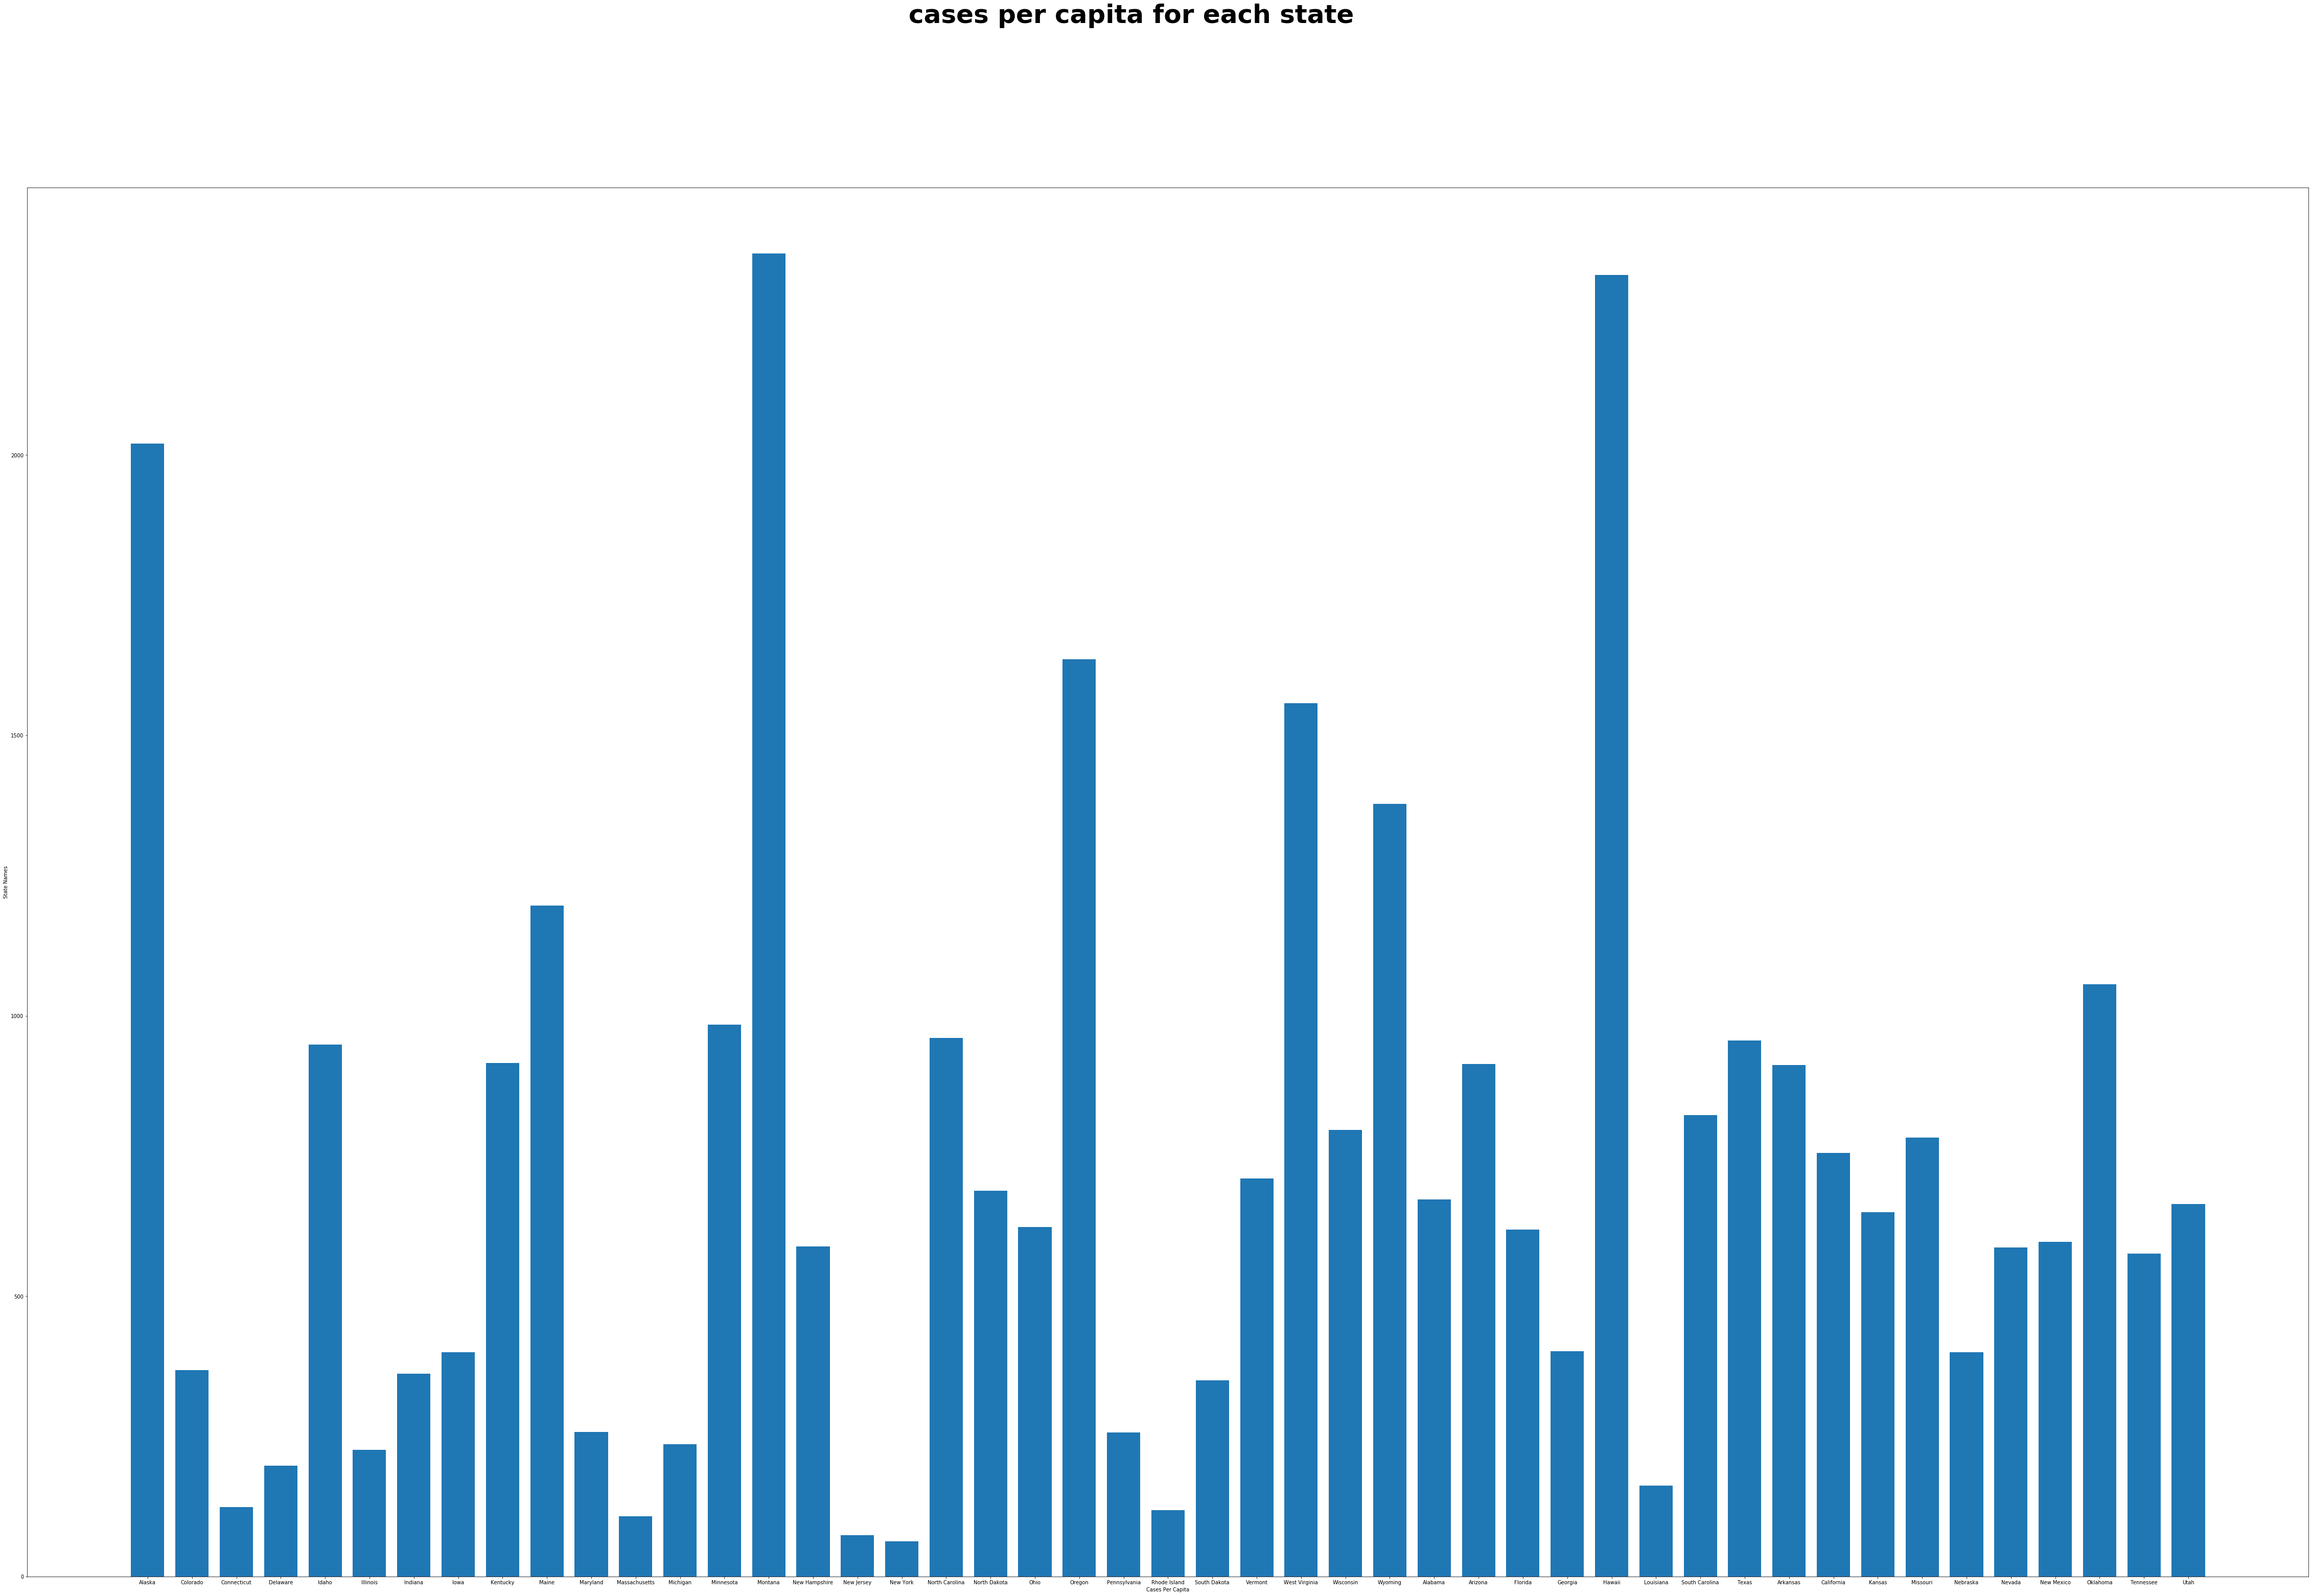

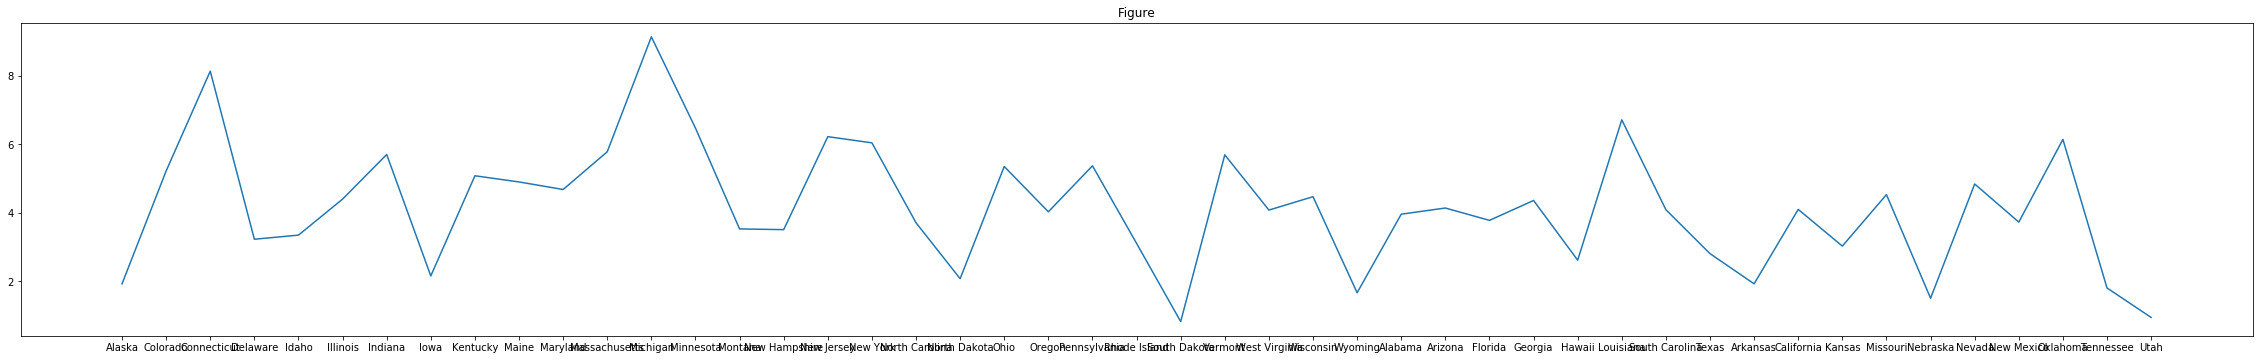

In [71]:

fig, ax = plt.subplots(1, figsize=(80, 50))
fig.suptitle('cases per capita for each state', fontsize=50, fontweight='bold')


ax.bar(mergeddf['state'], mergeddf['Cases Per Capita'],width = 0.75)
ax.set_xlabel('Cases Per Capita')
ax.set_ylabel('State Names')


variable = mergeddf['death %']
fig, ax = plt.subplots(1, figsize=(40, 6))
ax.plot(mergeddf['state'], variable)


fig.subplots_adjust(top=0.85)
ax.set_title('Figure')




# figsize = (12, 6)  #perameter

In [ ]:

fig, ax = plt.subplots(1, figsize=(80, 50))
fig.suptitle('cases per capita for each state', fontsize=50, fontweight='bold')


ax.bar(mergeddf['state'], mergeddf['Cases Per Capita'],width = 0.75)
ax.set_xlabel('Cases Per Capita')
ax.set_ylabel('State Names')


In [19]:
mergeddf['death %'] = 100 - (100* ((mergeddf['cases'] - mergeddf['deaths'])/mergeddf['cases']) )
mergeddf=mergeddf.round(2)

#mergeddf['recovery'] = 100*(mergeddf['deaths']/mergeddf['cases'])
print (mergeddf)

         date                 state  POPESTIMATE2019   cases  deaths  \
0  2020-05-01               Alabama          4903185    7294     289   
1  2020-05-01                Alaska           731545     362       7   
2  2020-05-01               Arizona          7278717    7962     330   
3  2020-05-01              Arkansas          3017804    3310      64   
4  2020-05-01            California         39512223   52318    2147   
5  2020-05-01              Colorado          5758736   15661     818   
6  2020-05-01           Connecticut          3565287   28764    2339   
7  2020-05-01              Delaware           973764    4918     159   
8  2020-05-01  District of Columbia           705749    4658     231   
9  2020-05-01               Florida         21477737   34720    1313   
10 2020-05-01               Georgia         10617423   26436    1153   
11 2020-05-01                Hawaii          1415872     610      16   
12 2020-05-01                 Idaho          1787065    1883    

## Hypothesis 2:
### the states with higher population will have higher spread compared to states with lower population

In [89]:
 = mergeddf.nlargest(10, 'Cases Per Capita')
#print(mergeddf.nlargest(5, 'POPESTIMATE2019'))
#print (mergeddf.nlargest(5, 'death %'))

SyntaxError: invalid syntax (<ipython-input-89-a590c2e857e0>, line 1)

### Conclusion:
### there is no correlation between the population of the place and community spread of COVID-19



In [11]:
mergeddf.sort_values(by=['Cases Per Capita', 'deaths Per Capita'],ascending=False)

,date,state,POPESTIMATE2019,cases,deaths,Cases Per Capita,deaths Per Capita,death %
26,2020-05-01,Montana,1068778,453,16,2359.33,66798.62,3.53
11,2020-05-01,Hawaii,1415872,610,16,2321.10,88492.00,2.62
1,2020-05-01,Alaska,731545,362,7,2020.84,104506.43,1.93
37,2020-05-01,Oregon,4217737,2579,104,1635.42,40555.16,4.03
48,2020-05-01,West Virginia,1792147,1151,47,1557.03,38130.79,4.08
50,2020-05-01,Wyoming,578759,420,7,1378.00,82679.86,1.67
19,2020-05-01,Maine,1344212,1123,55,1196.98,24440.22,4.90
36,2020-05-01,Oklahoma,3956971,3748,230,1055.76,17204.22,6.14
23,2020-05-01,Minnesota,5639632,5730,371,984.23,15201.16,6.47
33,2020-05-01,North Carolina,10488084,10922,405,960.27,25896.50,3.71


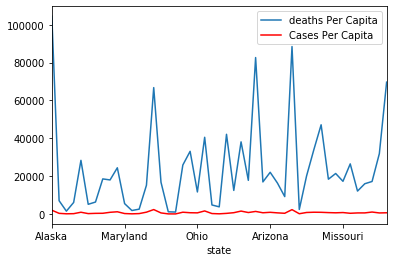

In [54]:
ax = plt.gca()

mergeddf.plot(kind='line',x='state',y='deaths Per Capita',ax=ax)
mergeddf.plot(kind='line',x='state',y='Cases Per Capita', color='red', ax=ax)

plt.show()

In [13]:
shapefile = 'cb_2018_us_state_500k.shp'
gdf = gp.read_file(shapefile)[['NAME', 'STUSPS','geometry']]

gdf.head()

,NAME,STUSPS,geometry
0,Mississippi,MS,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ..."
1,North Carolina,NC,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."
2,Oklahoma,OK,"POLYGON ((-103.00257 36.52659, -103.00219 36.6..."
3,Virginia,VA,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ..."
4,West Virginia,WV,"POLYGON ((-82.64320 38.16909, -82.64300 38.169..."


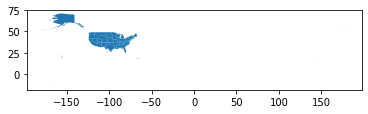

In [30]:
gdf.plot()
#scale decrease

In [55]:
mergeddf = mergeddf.merge(gdf, left_on='state', right_on='NAME')
mergeddf.head()

,state,POPESTIMATE2019,cases,deaths,Cases Per Capita,deaths Per Capita,death %,NAME_x,STUSPS_x,geometry_x,NAME_y,STUSPS_y,geometry_y
0,Alabama,4903185,7294,289,672.22,16966.04,3.96,Alabama,AL,"MULTIPOLYGON (((-88.05338 30.50699, -88.05109 ...",Alabama,AL,"MULTIPOLYGON (((-88.05338 30.50699, -88.05109 ..."
1,Alaska,731545,362,7,2020.84,104506.43,1.93,Alaska,AK,"MULTIPOLYGON (((179.48246 51.98283, 179.48656 ...",Alaska,AK,"MULTIPOLYGON (((179.48246 51.98283, 179.48656 ..."
2,Arizona,7278717,7962,330,914.18,22056.72,4.14,Arizona,AZ,"POLYGON ((-114.81629 32.50804, -114.81432 32.5...",Arizona,AZ,"POLYGON ((-114.81629 32.50804, -114.81432 32.5..."
3,Arkansas,3017804,3310,64,911.72,47153.19,1.93,Arkansas,AR,"POLYGON ((-94.61783 36.49941, -94.61765 36.499...",Arkansas,AR,"POLYGON ((-94.61783 36.49941, -94.61765 36.499..."
4,California,39512223,52318,2147,755.23,18403.46,4.10,California,CA,"MULTIPOLYGON (((-118.60442 33.47855, -118.5987...",California,CA,"MULTIPOLYGON (((-118.60442 33.47855, -118.5987..."


In [25]:
#mergeddf.date = pd.to_datetime(mergeddf.date)
#mergeddf.set_index('state', inplace=True)

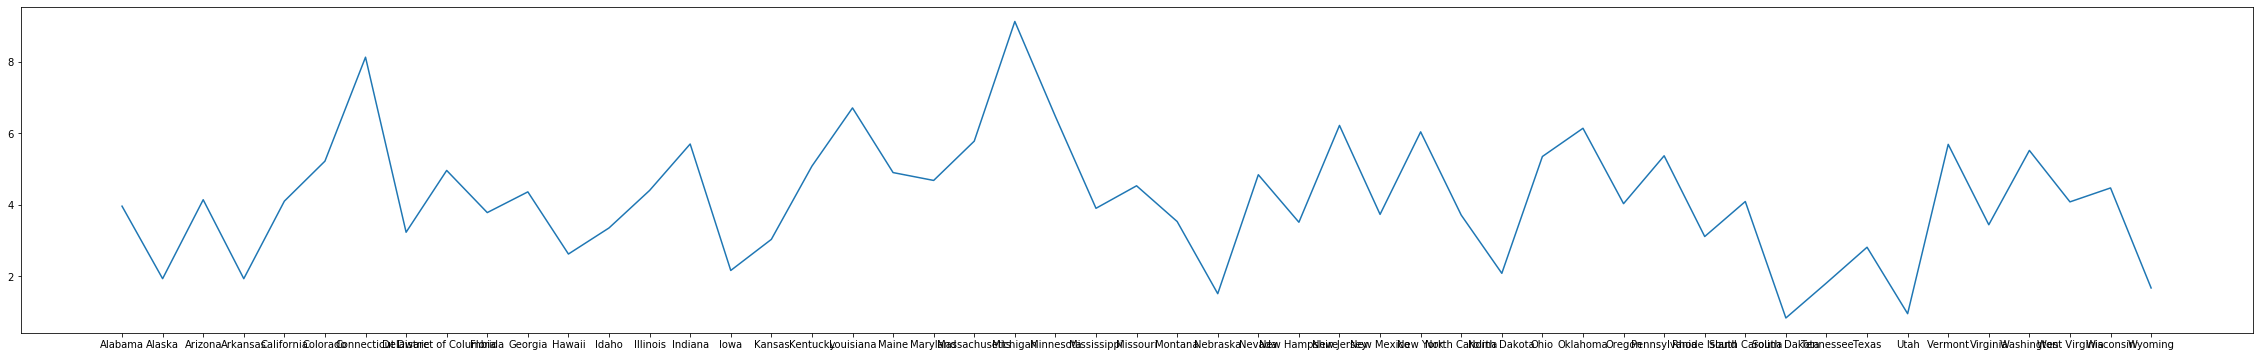

In [30]:
variable = mergeddf['death %']
fig, ax = plt.subplots(1, figsize=(40, 6))
ax.plot(mergeddf['state'], variable)



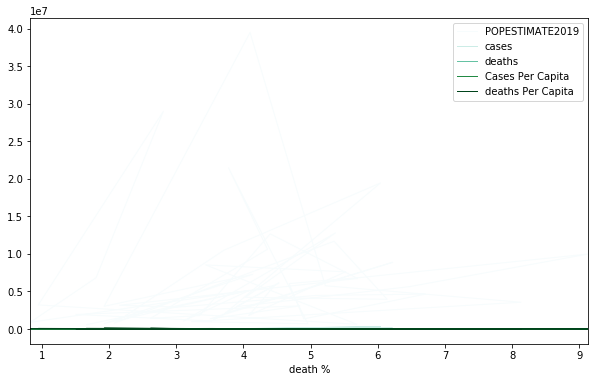

In [41]:
# set a variable that will call whatever column we want to visualise on the map
variable = df['death %']
# set the range for the choropleth
vmin, vmax = 500, 500
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))

mergeddf.plot( variable , cmap = 'BuGn', linewidth = 1, ax=ax)

#mergeddf.plot(column=variable, cmap='BuGn', linewidth=0.8, ax=ax, edgecolor='0.8')

In [38]:
# remove the axis
ax.axis('off')
# add a title
ax.set_title('cases per capita by states', fontdict={'fontsize': '25', 'fontweight' : '3'})
# create an annotation for the data source
ax.annotate('Source: CDC',xy=(0.1, .08), xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')
            
            
            
            

Text(0.1, 0.08, 'Source: CDC')

## Hypothesis 1
### States with lower temprature have lower cases per capita of COVID-19

In [92]:
mergeddf = temp.merge(mergeddf, left_on='State Name', right_on='state')
mergeddf.set_index ('state')
print(mergeddf)

      State Name_x    type_x    State Name_y    type_y    State Name_x  \
0          Alabama       Hot         Alabama       Hot         Alabama   
1           Alaska      Cold          Alaska      Cold          Alaska   
2          Arizona       Hot         Arizona       Hot         Arizona   
3         Arkansas  Moderate        Arkansas  Moderate        Arkansas   
4       California  Moderate      California  Moderate      California   
5         Colorado      Cold        Colorado      Cold        Colorado   
6      Connecticut      Cold     Connecticut      Cold     Connecticut   
7         Delaware      Cold        Delaware      Cold        Delaware   
8          Florida       Hot         Florida       Hot         Florida   
9          Georgia       Hot         Georgia       Hot         Georgia   
10          Hawaii       Hot          Hawaii       Hot          Hawaii   
11           Idaho      Cold           Idaho      Cold           Idaho   
12        Illinois      Cold        Il

In [61]:

h1 = (mergeddf.groupby('type'))
h1.head()

,State Name,type,State Name_x,type_x,State Name_y,type_y,date,state,POPESTIMATE2019,cases,deaths,Cases Per Capita,deaths Per Capita,death %
0,Alaska,Cold,Alaska,Cold,Alaska,Cold,2020-05-01,Alaska,731545,362,7,2020.84,104506.43,1.93
1,Colorado,Cold,Colorado,Cold,Colorado,Cold,2020-05-01,Colorado,5758736,15661,818,367.71,7040.02,5.22
2,Connecticut,Cold,Connecticut,Cold,Connecticut,Cold,2020-05-01,Connecticut,3565287,28764,2339,123.95,1524.28,8.13
3,Delaware,Cold,Delaware,Cold,Delaware,Cold,2020-05-01,Delaware,973764,4918,159,198.00,6124.30,3.23
4,Idaho,Cold,Idaho,Cold,Idaho,Cold,2020-05-01,Idaho,1787065,1883,63,949.05,28366.11,3.35
29,Alabama,Hot,Alabama,Hot,Alabama,Hot,2020-05-01,Alabama,4903185,7294,289,672.22,16966.04,3.96
30,Arizona,Hot,Arizona,Hot,Arizona,Hot,2020-05-01,Arizona,7278717,7962,330,914.18,22056.72,4.14
31,Florida,Hot,Florida,Hot,Florida,Hot,2020-05-01,Florida,21477737,34720,1313,618.60,16357.76,3.78
32,Georgia,Hot,Georgia,Hot,Georgia,Hot,2020-05-01,Georgia,10617423,26436,1153,401.63,9208.52,4.36
33,Hawaii,Hot,Hawaii,Hot,Hawaii,Hot,2020-05-01,Hawaii,1415872,610,16,2321.10,88492.00,2.62


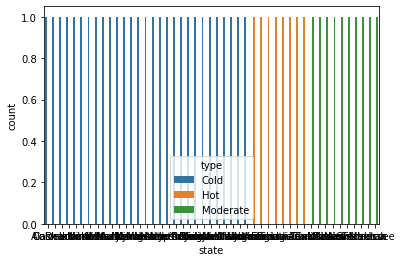

In [67]:
sns.countplot(x = 'state', data = mergeddf, hue = 'type')

Text(0, 0.5, 'State Names')

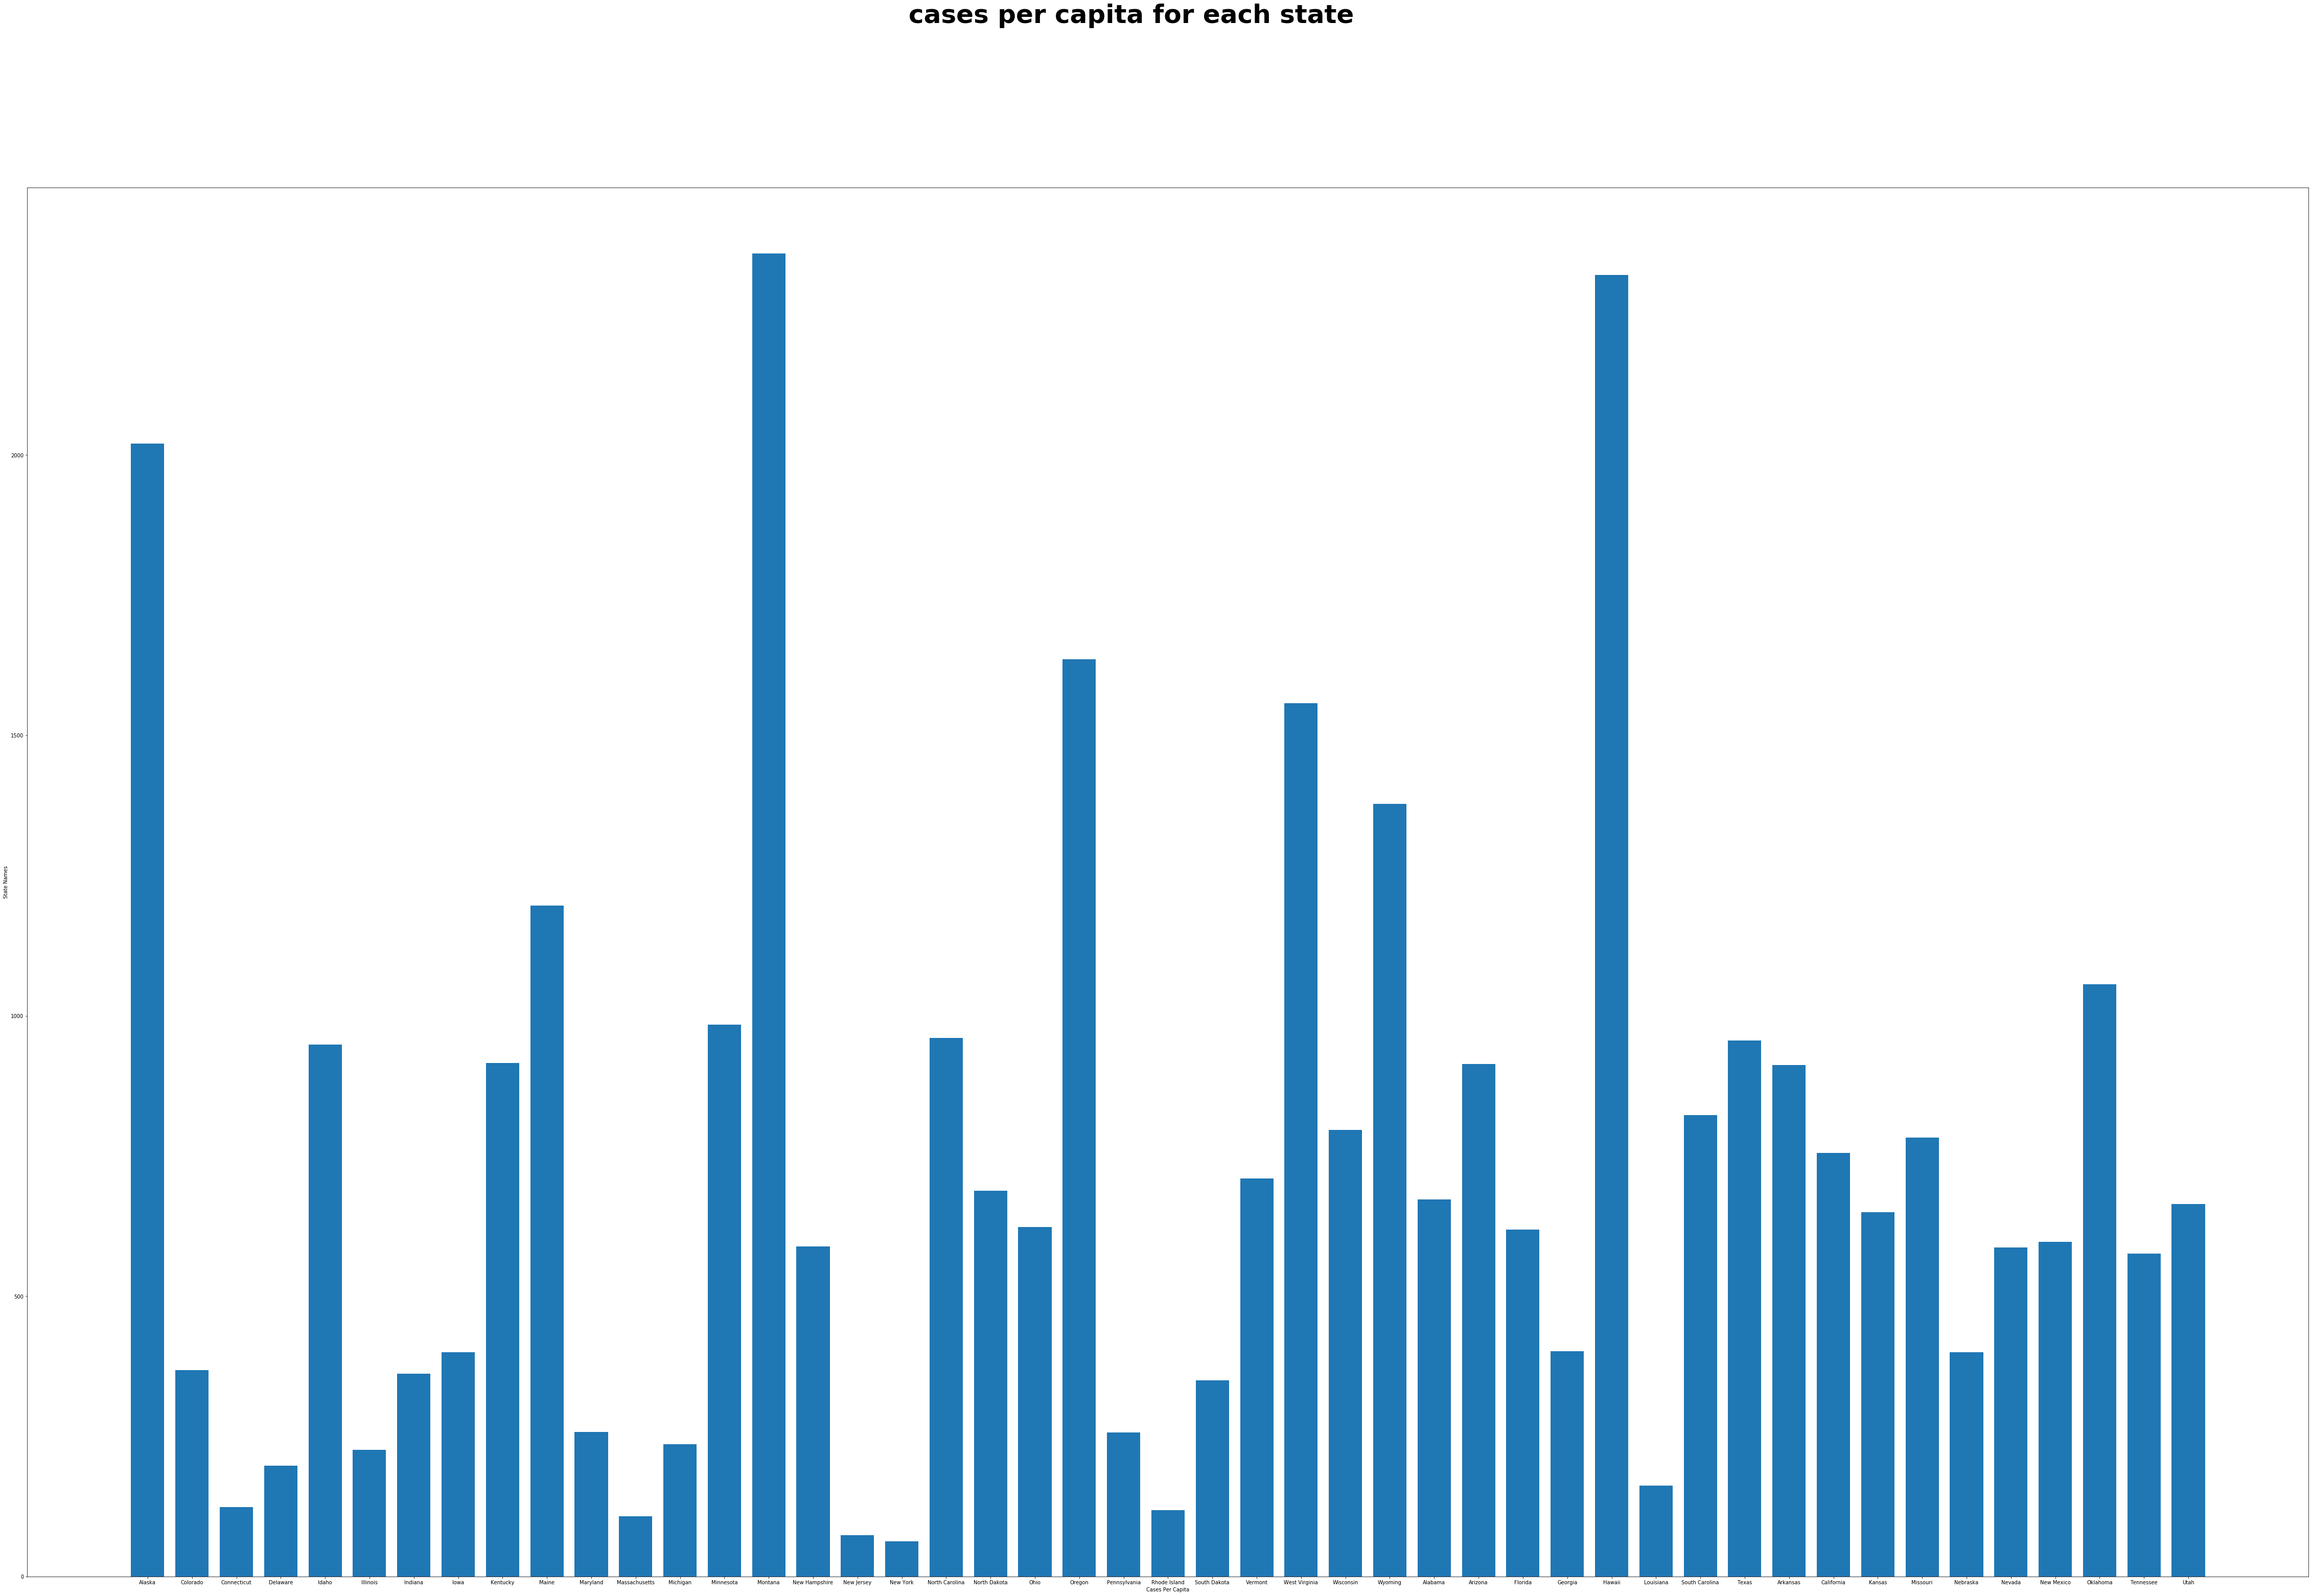

In [88]:
fig, ax = plt.subplots(1, figsize=(80, 50))
fig.suptitle('cases per capita for each state', fontsize=50, fontweight='bold')


ax.bar(mergeddf['state'], mergeddf['Cases Per Capita'],width = 0.75)
ax.set_xlabel('Cases Per Capita')
ax.set_ylabel('State Names')


### From the Graph we can see that the top 10 states with highest cases are as follows
#### montana Cold
#### hawaii Hot
#### alaska Cold
#### oregon Cold
#### west virgina Cold
#### wyoming Cold
#### maine Cold
#### oklahoma Moderate
#### Minnesota Cold
#### Nort Carolina Moderate

### 7 out of the top 10 states fall in cold region, hence we can conclude that regions with colder average temprature have higher cases of COVID-19 i.e there is correlation between temprature and spread of virus